In [1]:
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
import seaborn as sns
from matplotlib.pyplot import figure
import arviz as az
import pymc3 as pm
import pandas as pd

%matplotlib inline

In [2]:
ans = sns.load_dataset('anscombe')
x_3 = ans[ans.dataset == 'III']['x'].values
y_3 = ans[ans.dataset == 'III']['y'].values

Text(0.5, 0, '$y$')

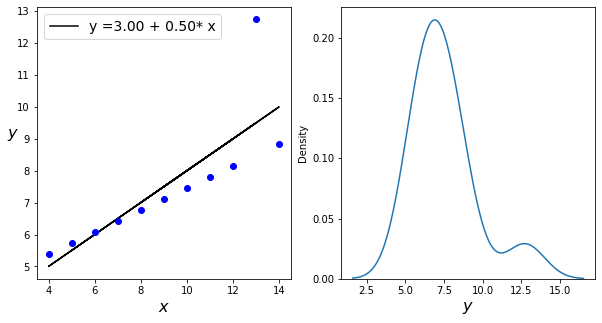

In [5]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
beta_c, alpha_c = stats.linregress(x_3, y_3)[:2]
plt.plot(x_3, (alpha_c + beta_c* x_3), 'k', label='y ={:.2f} + {:.2f}* x'.format(alpha_c, beta_c))
plt.plot(x_3, y_3, 'bo')
plt.xlabel('$x$', fontsize=16)
plt.ylabel('$y$', rotation=0, fontsize=16)
plt.legend(loc=0, fontsize=14)
plt.subplot(1,2,2)
sns.kdeplot(y_3);
plt.xlabel('$y$', fontsize=16)

In [6]:
with pm.Model() as model_t:
    alpha = pm.Normal('alpha', mu=0, sd=100)
    beta = pm.Normal('beta', mu=0, sd=1)
    epsilon = pm.HalfCauchy('epsilon', 5)
    nu = pm.Deterministic('nu', pm.Exponential('nu_', 1/29) + 1)
    y_pred = pm.StudentT('y_pred', mu=alpha + beta * x_3,
     sd=epsilon, nu=nu, observed=y_3)
    start = pm.find_MAP()
    step = pm.NUTS(scaling=start)
    trace_t = pm.sample(2000, step=step, start=start)

<ipython-input-6-61119e2fdecc>:10: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  trace_t = pm.sample(2000, step=step, start=start)
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [nu_, epsilon, beta, alpha]


Sampling 4 chains for 1_000 tune and 2_000 draw iterations (4_000 + 8_000 draws total) took 115 seconds.
There were 306 divergences after tuning. Increase `target_accept` or reparameterize.
There were 278 divergences after tuning. Increase `target_accept` or reparameterize.
There were 237 divergences after tuning. Increase `target_accept` or reparameterize.
The chain reached the maximum tree depth. Increase max_treedepth, increase target_accept or reparameterize.
There were 265 divergences after tuning. Increase `target_accept` or reparameterize.
The rhat statistic is larger than 1.4 for some parameters. The sampler did not converge.
The estimated number of effective samples is smaller than 200 for some parameters.


/usr/local/lib/python3.9/site-packages/arviz/data/io_pymc3.py:96: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  warnings.warn(
/usr/local/lib/python3.9/site-packages/arviz/stats/density_utils.py:620: RuntimeWarning: invalid value encountered in double_scalars
  x_std = (((x ** 2).sum() / x_len) - (x.sum() / x_len) ** 2) ** 0.5
/usr/local/lib/python3.9/site-packages/arviz/stats/density_utils.py:770: UserWarning: Something failed when estimating the bandwidth. Please check your data
  warnings.warn("Something failed when estimating the bandwidth. Please check your data")
/usr/local/lib/python3.9/site-packages/arviz/stats/density_utils.py:783: RuntimeWarning: divide by zero encountered in true_divide
  pdf /= bw * (2 * np.pi) ** 0.5
/usr/local/lib/python3.9/site-packages/arviz/stats/density_ut

array([[<AxesSubplot:title={'center':'alpha'}>,
        <AxesSubplot:title={'center':'alpha'}>],
       [<AxesSubplot:title={'center':'beta'}>,
        <AxesSubplot:title={'center':'beta'}>],
       [<AxesSubplot:title={'center':'epsilon'}>,
        <AxesSubplot:title={'center':'epsilon'}>],
       [<AxesSubplot:title={'center':'nu_'}>,
        <AxesSubplot:title={'center':'nu_'}>],
       [<AxesSubplot:title={'center':'nu'}>,
        <AxesSubplot:title={'center':'nu'}>]], dtype=object)

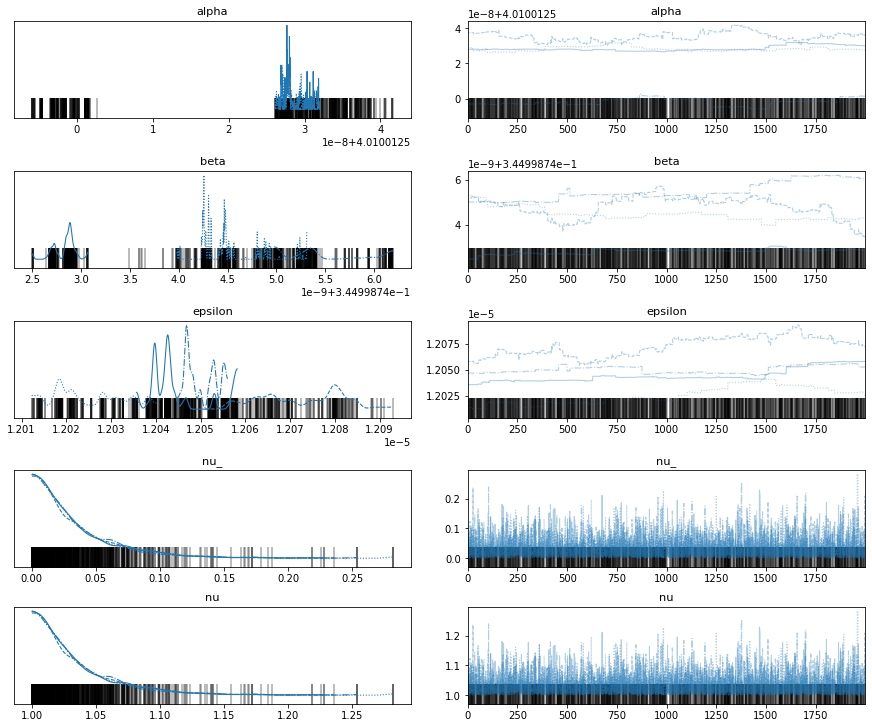

In [12]:
az.plot_trace(trace_t)

<ipython-input-8-8ec7e7232c5a>:1: DeprecationWarning: The function `autocorrplot` from PyMC3 is just an alias for `plot_autocorr` from ArviZ. Please switch to `pymc3.plot_autocorr` or `arviz.plot_autocorr`.
  pm.autocorrplot(trace_t)
/usr/local/lib/python3.9/site-packages/arviz/data/io_pymc3.py:96: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  warnings.warn(


array([[<AxesSubplot:title={'center':'alpha\n0'}>,
        <AxesSubplot:title={'center':'alpha\n1'}>,
        <AxesSubplot:title={'center':'alpha\n2'}>,
        <AxesSubplot:title={'center':'alpha\n3'}>],
       [<AxesSubplot:title={'center':'beta\n0'}>,
        <AxesSubplot:title={'center':'beta\n1'}>,
        <AxesSubplot:title={'center':'beta\n2'}>,
        <AxesSubplot:title={'center':'beta\n3'}>],
       [<AxesSubplot:title={'center':'epsilon\n0'}>,
        <AxesSubplot:title={'center':'epsilon\n1'}>,
        <AxesSubplot:title={'center':'epsilon\n2'}>,
        <AxesSubplot:title={'center':'epsilon\n3'}>],
       [<AxesSubplot:title={'center':'nu_\n0'}>,
        <AxesSubplot:title={'center':'nu_\n1'}>,
        <AxesSubplot:title={'center':'nu_\n2'}>,
        <AxesSubplot:title={'center':'nu_\n3'}>],
       [<AxesSubplot:title={'center':'nu\n0'}>,
        <AxesSubplot:title={'center':'nu\n1'}>,
        <AxesSubplot:title={'center':'nu\n2'}>,
        <AxesSubplot:title={'center':'nu

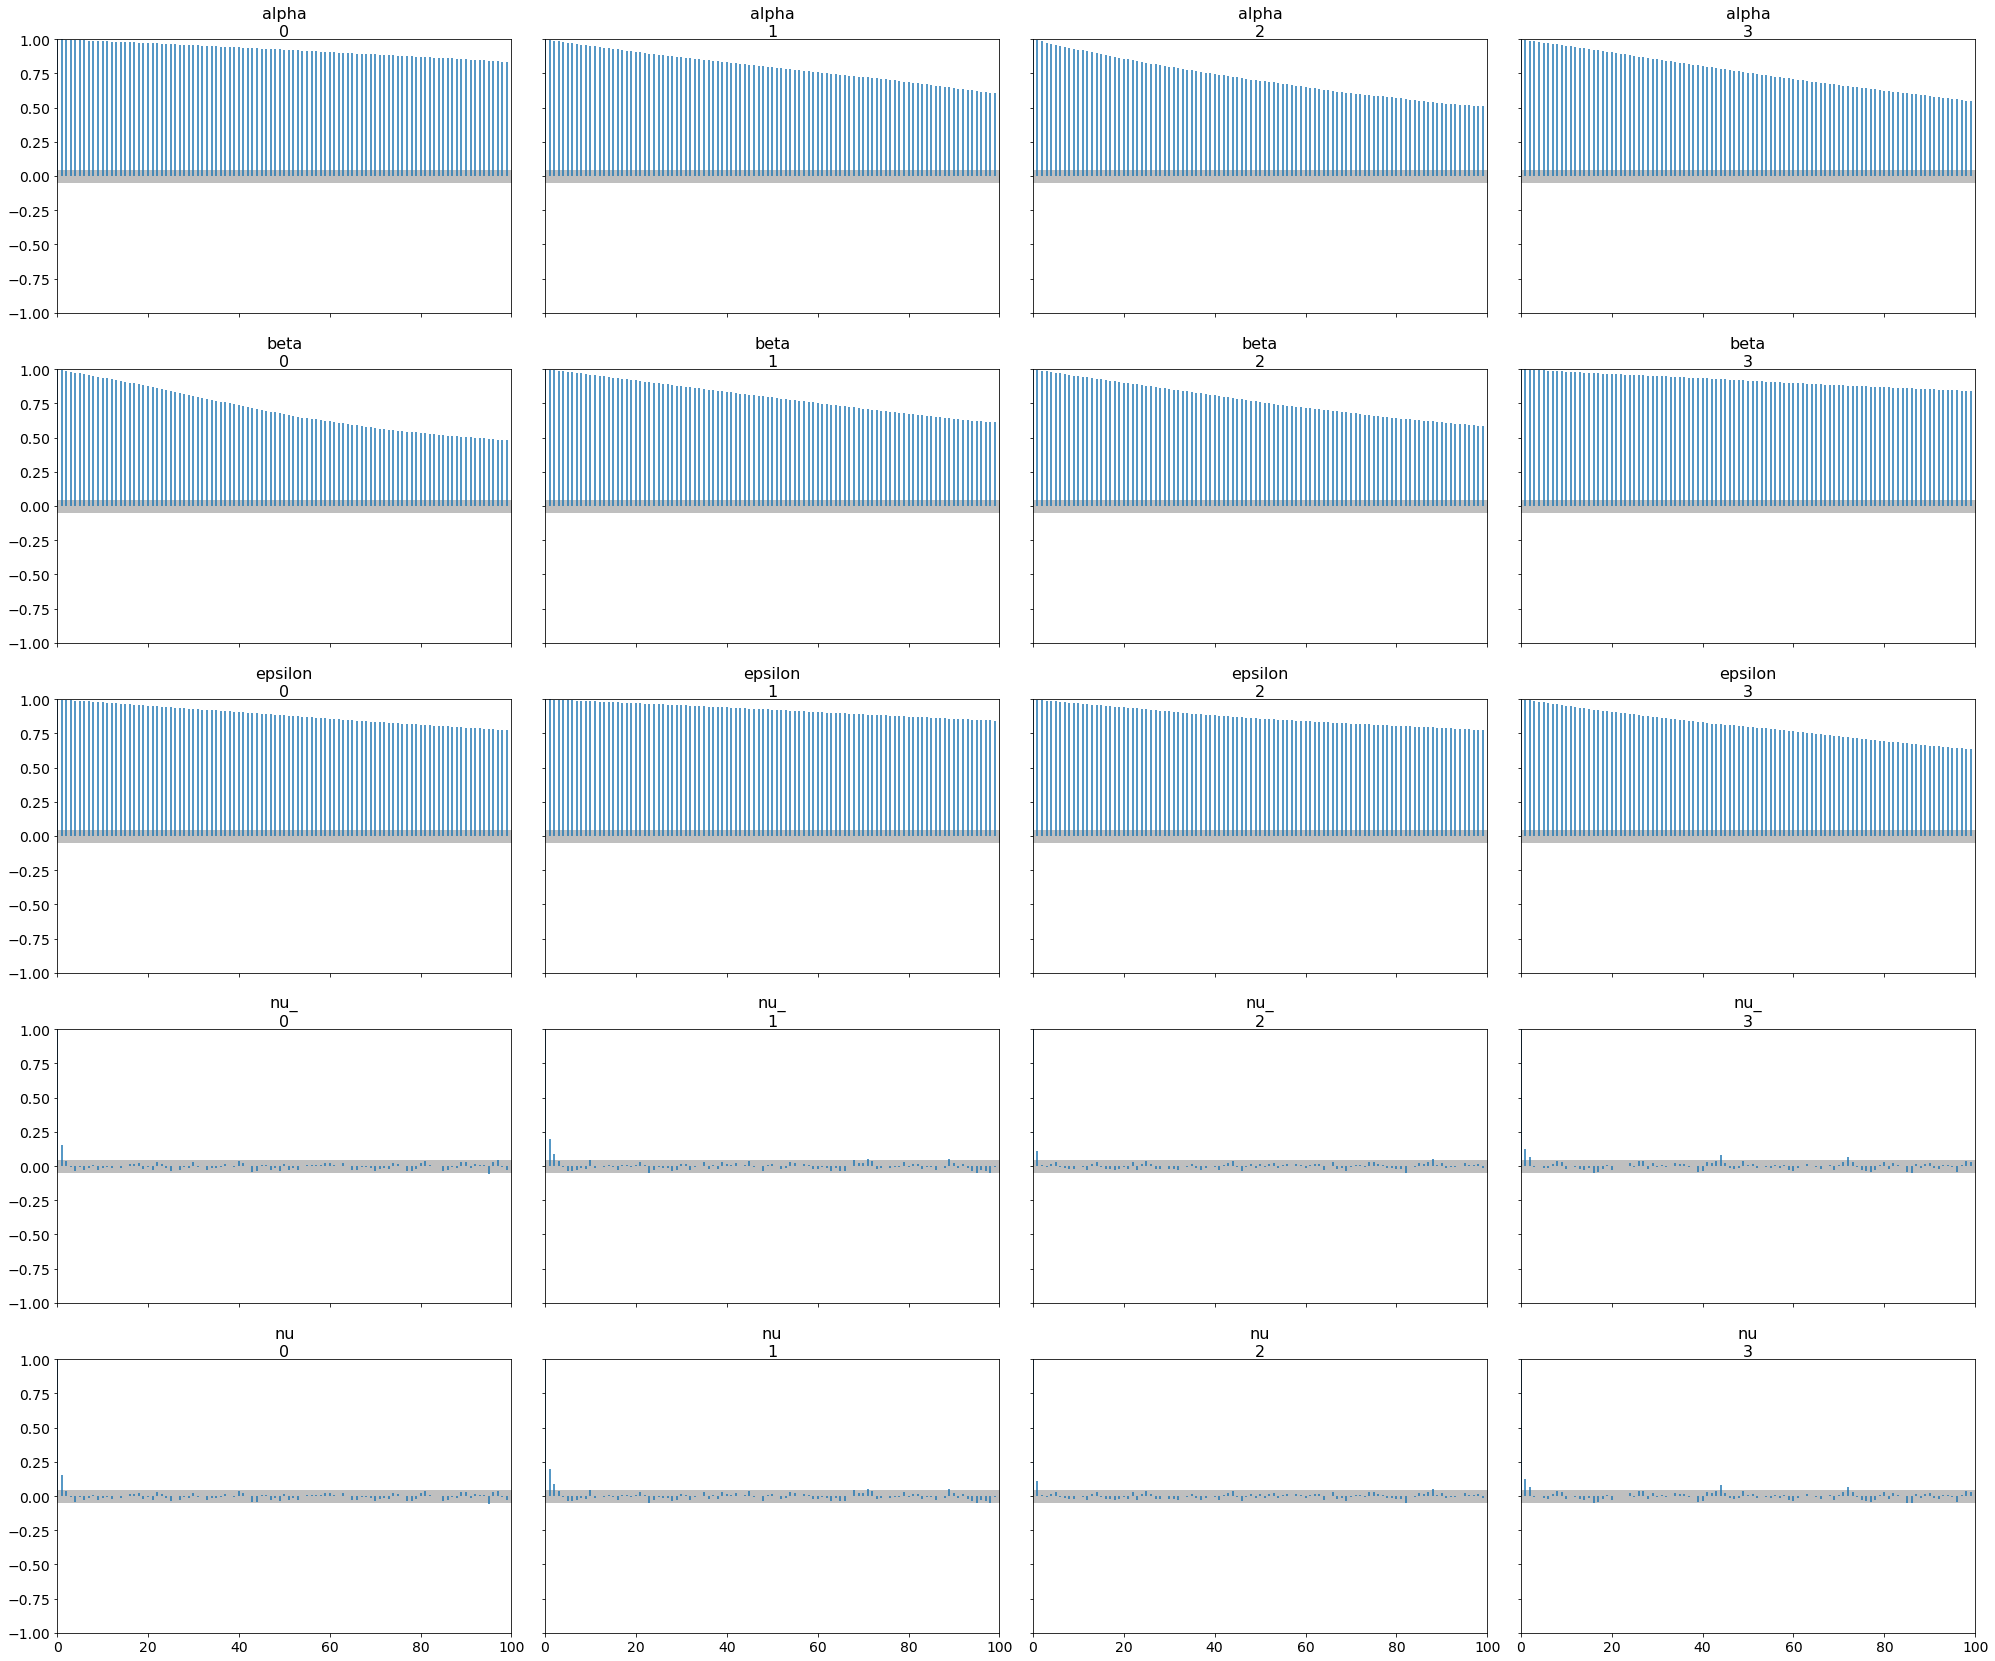

In [8]:
pm.autocorrplot(trace_t)

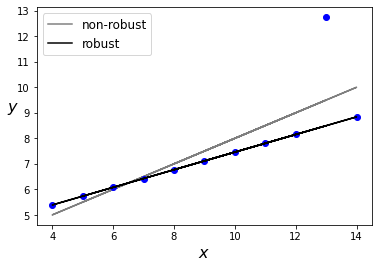

In [9]:
beta_c, alpha_c = stats.linregress(x_3, y_3)[:2]
plt.plot(x_3, (alpha_c + beta_c * x_3), 'k', label='non-robust',
 alpha=0.5)
plt.plot(x_3, y_3, 'bo')
alpha_m = trace_t['alpha'].mean()
beta_m = trace_t['beta'].mean()
plt.plot(x_3, alpha_m + beta_m * x_3, c='k', label='robust')
plt.xlabel('$x$', fontsize=16)
plt.ylabel('$y$', rotation=0, fontsize=16)
plt.legend(loc=2, fontsize=12)

/usr/local/lib/python3.9/site-packages/pymc3/sampling.py:1689: UserWarning: samples parameter is smaller than nchains times ndraws, some draws and/or chains may not be represented in the returned posterior predictive sample
  warnings.warn(


<AxesSubplot:ylabel='Density'>

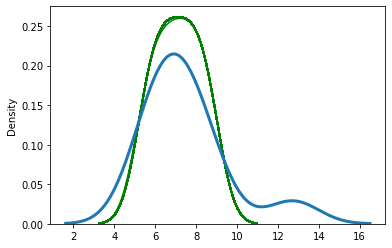

In [16]:
ppc = pm.sample_posterior_predictive(trace_t, samples=200, model=model_t, random_seed=2)
for y_tilde in ppc['y_pred']:
    sns.kdeplot(y_tilde, alpha=0.5, c='g')
sns.kdeplot(y_3, linewidth=3)